<a href="https://colab.research.google.com/github/JamesSavages/Convolutional-Neural-Networks-Plant-Seedlings-Image-Classification-Using-CNNs/blob/main/02_neural_network_classification_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Introdution to Neural Networks Classification with TensorFlow**

In this notebook we going to learn how to write neural networks for clasificaiotns problems. 

A classifcation is where you try to classify something as one thing or another. A few types of classification problesm:

* Binary classification - you are looking to predict 1 of 2 options.
* Muticlass classification - you are looking to predict one outcome from various class
* Multilabel classification - more than 1 label can be assigned to the output. 



###**Creating data to view and fit**

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000
# Create Circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)


In [2]:
# Check our the featrues
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

**Our data is a little hard to understand nopw. Lets visualize it.** 

In [4]:
import pandas as pd
# for the conversion for a pd dataframe we want all of the items in the first and second axis. 
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


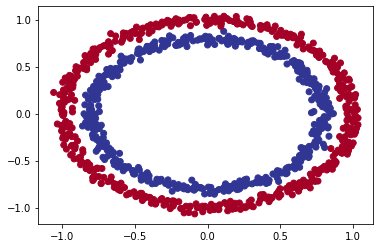

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

##**Steps in Modelling**

The steps in modelling with TF are typically:

1. Create or import a model
2. Compile a model
3. Fit the model
4. Evaluate the model

In [119]:
# Import Tensorflow
import tensorflow as tf

In [7]:
# Set the random seed
tf.random.set_seed(42)

# 1. Creat the model 
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)                               
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X,y,epochs=5)

# accuracy tells us the percentage of the time our model was write. So, in the below output, 48% of the time our mdoel
# was correct. 

Epoch 1/5
32/32 [==============================] - 6s 4ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/5
32/32 [==============================] - 0s 4ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/5
32/32 [==============================] - 0s 6ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/5
32/32 [==============================] - 0s 6ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 4.0784 - accuracy: 0.4240


In [8]:
# Lets try improve our model by training for longer
model_1.fit(X,y,epochs=200,verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4930


[0.6932026743888855, 0.49300000071525574]

Since we are working on a binary classification problem and our model is getting around 50% accuracy.... its performing as if its guessing/ 

So, lets step things up a notch and add an extra layer.

In [9]:
# Set teh randomw seed.
tf.random.set_seed(42)

# 1.  Create the model, this time with 2 layers
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)                               
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X,y,epochs=100,verbose=0)

In [10]:
# Evaluate the model
model_2.evaluate(X,y) # we are evaluating on the same data. we should not do this in general, but for the puspose of this class we will

# the results below show that the model is still in guessing mode. This is because we have an even sample of both, hence it is guessing with 
# 50% accuracy

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

In [11]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

###**Improving our model**

Lets look into our bag of tricks to see how we can improve our model.

1. Create a model - we might want to add more layers or increase the hidden units within a layer.
2. Compile a model - we may want to choose a different optimization function, such as Adam instead of SGD
3. Fitting a model - we might fit out model for more epochs (leave it train for longer)

In [12]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add 10 dense neurons
  tf.keras.layers.Dense(1)                               
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model 
model_3.fit(X,y,epochs=100,verbose=0)  

In [13]:
# 4. Evaluate the model
model_3.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.5090


[0.6980189681053162, 0.5090000033378601]

###**To Visualize our models predictions, lets create a functions `plot_decisions_boundary()`. This function will:**

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values 
* Make predictions across the meshgrid
* PLot the meshgrid as well as a line bvetween the differen tzones (where each uniques class falss).

In [14]:
import numpy as np

In [15]:
def plot_decisions_boundary(model,X,y):
  """
  Plots decision bounday created by a model prediciting on X.
  This function was inspired by 2 resources (refer to extra curriculum):
  1 - 
  2 - 
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classifcation...


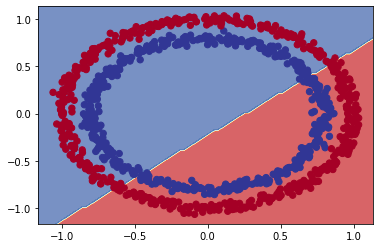

In [16]:
# CHeck out the predicions our model is making
plot_decisions_boundary(model=model_3,
                        X=X,
                        y=y)

# based on the results, the model is predicing on a regression model i.e. trying to fit a straight/linear line. However, we have non linear data. This would explain the bad results. 

In [22]:
# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the data
# Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

# After TensorFlow 2.7.0, see here for more: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/278
#model_3.fit(tf.expand_dims(X_reg_train, axis=-1), 
            #y_reg_train,
            #epochs=100)

Oh wait... we compiled our model for a binary classification problem, but we are now working on a regression problem. Lets change our model to suit the data. We will therefore have to recreate model_3

In [24]:
# set the seed
tf.random.set_seed(42)

# 1. Creat the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)                               
])

# 2. Compile the model, this time with a regression specific loss function
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Fit the recompiled model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),  # <- after 2.7.0
            y_reg_train, 
            epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 248.2148 - mae: 248.2148
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 138.8992 - mae: 138.8992
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 53.1035 - mae: 53.1035
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 73.5183 - mae: 73.5183
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 71.2370 - mae: 71.2370
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 47.0045 - mae: 47.0045
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 45.9375 - mae: 45.9375
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 42.3635 - mae: 42.3635
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 43.6835 - mae: 43.6835
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 42.6201 - mae: 42.6201
Epoch 11/100
5/5 [==============================] - 0s 

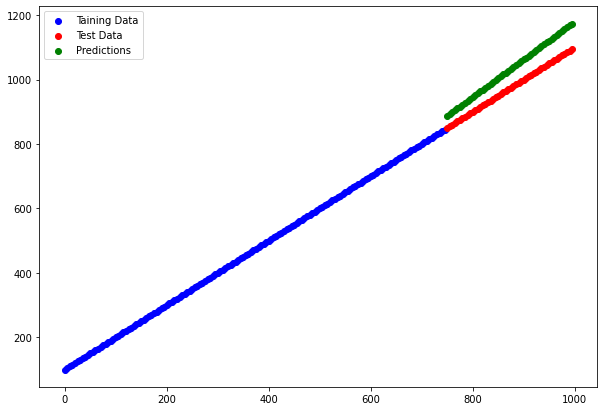

In [25]:
# Make predicstions wih the trained model
y_reg_pred = model_3.predict(X_reg_test)

# Plot the model predicionts against the regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train,c="b",label="Taining Data")
plt.scatter(X_reg_test,y_reg_test,c="r",label="Test Data")
plt.scatter(X_reg_test,y_reg_pred,c="g",label="Predictions")
plt.legend();

## The missing piece is non-linearity

In [26]:
# Lets see if our model can be used for a regression problem...
tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5) # y= X +10

# Split our regresion data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
model_3.fit(X_reg_train,y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 4ms/step - loss: 38.1029 - mae: 38.1029
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 37.9900 - mae: 37.9900
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 38.0776 - mae: 38.0776
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 37.9455 - mae: 37.9455
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 37.9857 - mae: 37.9857
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 37.9580 - mae: 37.9580
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 38.1303 - mae: 38.1303
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 38.0091 - mae: 38.0091
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 37.6468 - mae: 37.6468
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 37.8143 - mae: 37.8143
Epoch 11/100
5/5 [==============================] - 0s 3ms/

### The Missing Piece : Non-Linearity

In [27]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1,activation=tf.keras.activations.linear)

])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                                                   metrics=["accuracy"])

# 3. Fit the model
history = model_4.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 3.9575 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 3.8372 - accuracy: 0.4090
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7656 - accuracy: 0.4120
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 3.7378 - accuracy: 0.4170
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 3.6978 - accuracy: 0.4190
Epoch 11/

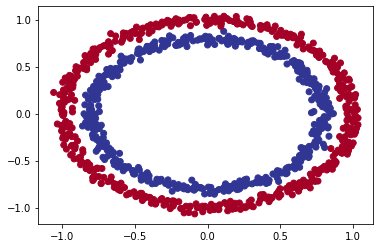

In [28]:
# Check out our data
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

doing binary classifcation...


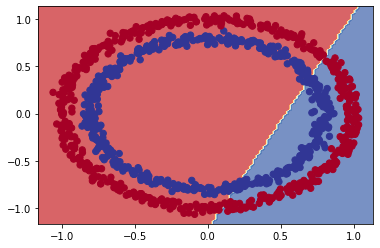

In [29]:
# Check the decision boundaary for our latest model
plot_decisions_boundary(model=model_4,X=X,y=y)

#### Lets try build our first non linear neural network with non-linear activation function

In [30]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model with a non-linear activations
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)                               
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_5.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9575 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8372 - accuracy: 0.4090
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 3.7656 - accuracy: 0.4120
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 3.7378 - accuracy: 0.4170
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 3.6978 - accuracy: 0.4190
Epoch 11/

In [31]:
# Time to replicate the multi-layer neural network from Tensorflow playground into code

# Set the seed
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1)                              
])


# 2. Compile the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_6.fit(X, y, epochs=250) 

Epoch 1/250
32/32 [==============================] - 1s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [32]:
# Evaluate the model
model_6.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

doing binary classifcation...


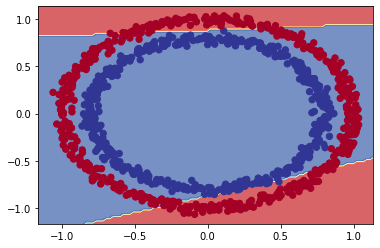

In [33]:
# How do our predictions look
plot_decisions_boundary(model_6,X,y)

In [34]:
# the missing piece for the model thus far has been the activation function in the output layer

# Set th e random see
tf.random.set_seed(42)

# 1. Create a model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")                              
])

# 2. COmpile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_7.fit(X,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/

In [35]:
# 4. Evaluate our model
model_7.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.2948 - accuracy: 0.9910


[0.29480040073394775, 0.9909999966621399]

doing binary classifcation...


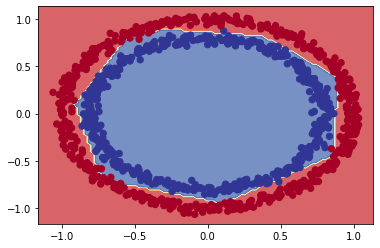

In [36]:
# Lets visualize our metrics
plot_decisions_boundary(model_7,X,y)

# from our results the decision boundary looks to be splitting the classes perfectly. 

**Questions:** Whats wrong with the predicions that we've made? Are we really evaluating our model correctly? Hint: what data did the model learn on and what data did we predict on?

**Note:** The combination of **linear (stright linese) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks. 

Now we haev discussed the concept of linear and non linear functions (or lines. Lets see them in action. 

In [37]:
# Create a toy tesnro (similar to the data we pass into our models)
A = tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

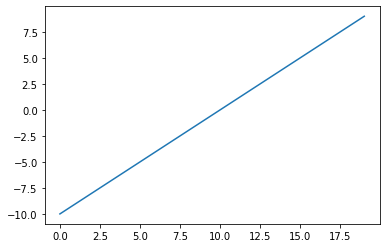

In [38]:
# Visualize our toy tensor
plt.plot(A);

In [39]:
# Lets start by replicating sigmoid - sigmoid = 1/(1+exp(-x))
def sigmoid(x):
  return 1/(1+tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

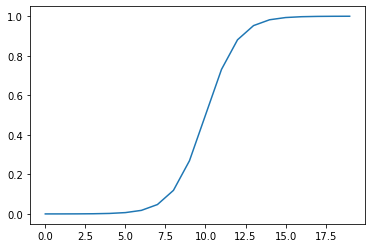

In [40]:
# Plot our toy tensor tranformed by sigmoid
plt.plot(sigmoid(A));

In [41]:
# Lets recreate the relu function
def relu(x):
  return tf.maximum(0,x)

# Pass our toy tensor to our custom relu functions
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

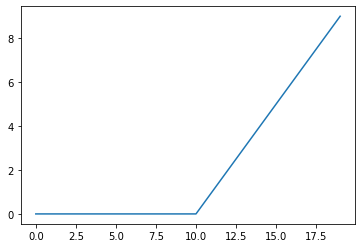

In [42]:
# Pot Relu-modified tensor
plt.plot(relu(A));

In [43]:
# Lets try teh linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

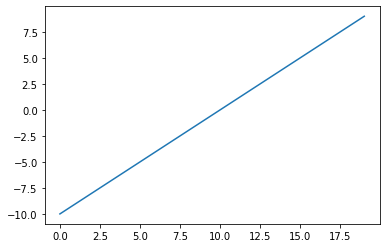

In [44]:
# Does the linear activation function change anything?
plt.plot(tf.keras.activations.linear(A));

## Evaluating and improving our classifications

So far we haev been training and testing on the same dataset... However, in machine learning this is basically a sing. So lets create a trainign and test set. 

In [45]:
# Check how many examples we have
len(X)

1000

In [46]:
# Split into train and test sets using indexing in this case
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [47]:
# Lets recreate a model to fit on teh training data and evaluate on the test data

# Set random see
tf.random.set_seed(42)

# 1. Create the model (same as model_7)
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")                               
])

# 2. Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 3. Fit the model 
history = model_8.fit(X_train,y_train, epochs=25)

# We haev increased the learning rate here. Think of the learning rate being how much you need the weights to adjust.
# Given the model will begin to learn more at a faster rate, we are reducing the number of epochs. 

Epoch 1/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/25
25/25 [

In [48]:
# Evaluate teh model on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1247 - accuracy: 1.0000


[0.12468848377466202, 1.0]

doing binary classifcation...
doing binary classifcation...


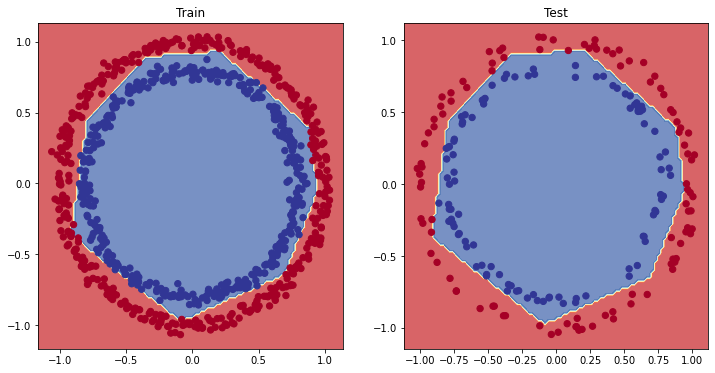

In [49]:
# PLot the decision boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decisions_boundary(model_8,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decisions_boundary(model_8,X=X_test,y=y_test)
plt.show();

In [50]:
model_8.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 4)                 12        
                                                                 
 dense_24 (Dense)            (None, 4)                 20        
                                                                 
 dense_25 (Dense)            (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


### Plot the loss (or training) curves

In [51]:
# Convert the history object into a data frame
pd.DataFrame(history.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673594,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641257,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571403,0.77375


Text(0.5, 1.0, 'Mode_8 loss curve')

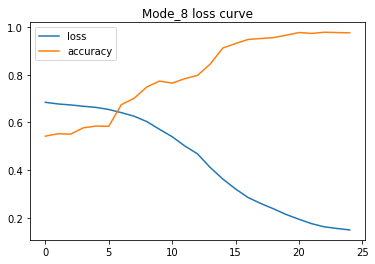

In [52]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Mode_8 loss curve")

**Note**: For many problems, the loss function going down means the model is improving (the predictions its making are getting groud truth labels). 

###**Finding the best learning rate**

To find the ideal learning rate (the earning rate where the loss decreases the most during training) we're going to use the following steps:

* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add *while* its training. 

* ANother model (we could use the same one as above, but we're practicing building models here)

* A modified loss curves plot. 



In [53]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")                               
])

# Comoile the model
model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Create a learning rate callbacl
lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# fit the nmodel (passing lr_schedular callback)
history_9 = model_9.fit(X_train,
                        y_train,
                        epochs=100,
                        callbacks=[lr_schedular])



Epoch 1/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6898 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

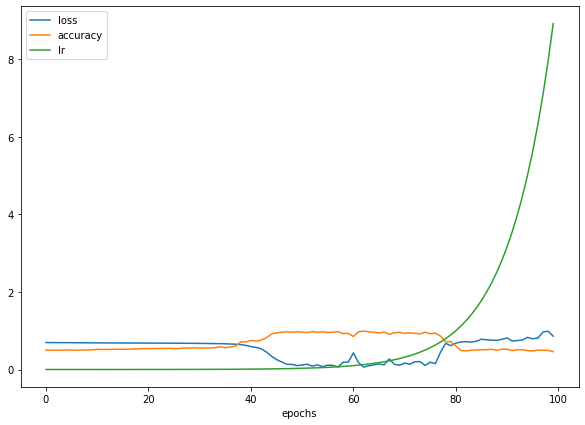

In [54]:
# Check out the history
pd.DataFrame(history_9.history).plot(figsize=(10,7),xlabel="epochs")

Text(0.5, 1.0, 'Learning Rate versus Loss')

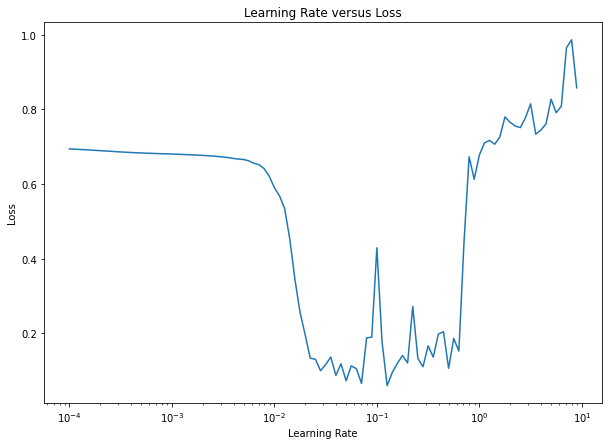

In [55]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate versus Loss")

In [56]:
# Example of other typical learning rate values:
10**0,10**-1,10**-3,1e-4

(1, 0.1, 0.001, 0.0001)

In [57]:
# Lets try using a higher ideal learning rate with teh same model as before

# Set random seed
tf.random.set_seed(42)

# Create teh model

model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")                                
])

# Comnpile thre model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=["accuracy"])

# Fit the model for 20 epochs (less given we are trying the ideal learning rate)
history_10 = model_10.fit(X_train,y_train,epochs=20)

Epoch 1/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/20
25/25 [

In [58]:
# Evaluate the model_10 on the test data
model_10.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0574 - accuracy: 0.9900


[0.057401832193136215, 0.9900000095367432]

In [59]:
# Evaluate model_8 - this was the model we were comparing to
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1247 - accuracy: 1.0000


[0.12468848377466202, 1.0]

doing binary classifcation...
doing binary classifcation...


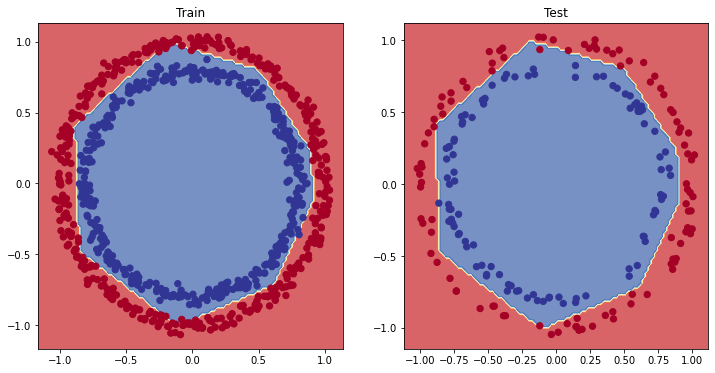

In [60]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1) # the subplot will have 1 row, 2 columns and the last 1 is the first elemenet. 
plt.title("Train")
plot_decisions_boundary(model_10,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decisions_boundary(model_10,X=X_test,y=y_test)
plt.show()

## More classifications evaluations methods

Alongside wivuslaizing ou rmodesl results as much as possible, there are a handful of other classification evaluations methods and metrics you should be familar with:
* Accuracy
* precision
* Recall
* F1-Score
* Confusion Matrix
* Classificaiton report (from scikit-learn - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html


In [61]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test,y_test)
print(f'Model loss on the test set: {loss}')
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.0574 - accuracy: 0.9900
Model loss on the test set: 0.057401832193136215
Model accuracy on the test set: 99.00%


### How about a confusion matric?



In [75]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
#y_preds = model_10.predict(X_test)

# Create confusion matrix
#confusion_matrix(y_test,y_preds)

# from this we got an error. This was related to the test array being in binary form and the 
# prediction array being in continuous form 

In [76]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [77]:
y_preds[:10]

array([[9.8526543e-01],
       [9.9923790e-01],
       [9.9032354e-01],
       [9.9706942e-01],
       [3.9623031e-01],
       [1.8126901e-02],
       [9.6829069e-01],
       [1.9746734e-02],
       [9.9967170e-01],
       [5.6459213e-04]], dtype=float32)

Oops.... looks like our predictions array has come our in ""prediction probability"" form.... the standard output from the sigmoid (or softmax)
activation functions. 

In [78]:
# Convert our prediction probabiities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [79]:
# Create confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[99,  2],
       [ 0, 99]])

### How about we prettify our confusion matrix?


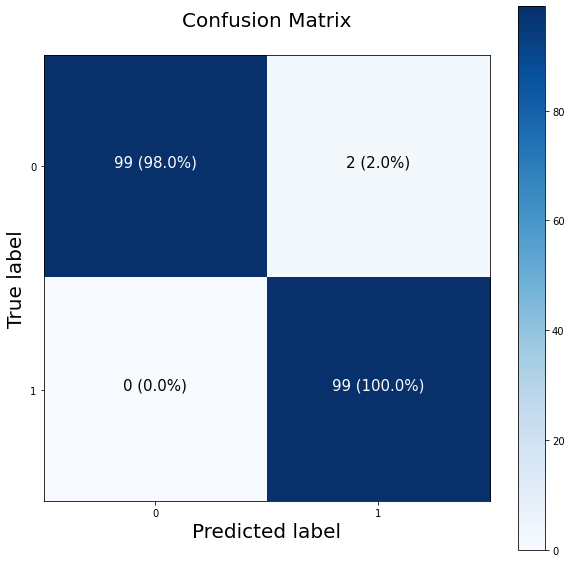

In [82]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb 
import itertools
figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

##**Working with a larger example (multiclass classifications)**

When you have more than 2 classes as an option, its known as multi class classification.

* This means that if you have 3 different classes, its multi class
* It means that if you have 100 its also multi class. 
* To practice multi class classifcaiton, we are going to build a NN to classify images of different items of clothing. 

In [83]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and tests sets for us. 
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [84]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training lkabel:\n{train_labels[0]}\n")



Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [85]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

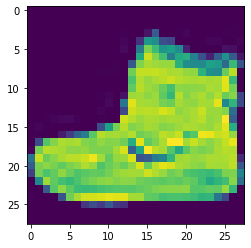

In [86]:
# Plot a single sample
import matplotlib.pyplot as plt

plt.imshow(train_data[0]);

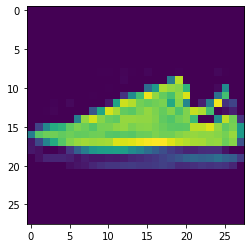

In [87]:
plt.imshow(train_data[6]);

In [88]:
# CHeck out sample labels. 

train_labels[7]

2

In [89]:
# Create a small list so we can index onto our training labels so theyre human readable
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

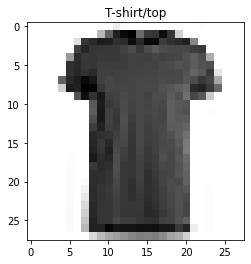

In [90]:
# Plot an exmaple image and its label
index_of_choice = 17
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

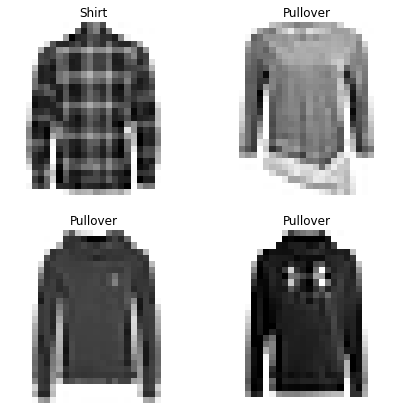

In [91]:
# PLot multiple radndom images of fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax=plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)  


## Building a multiclass classifcation model 

For our multi class classification model, we can use a similar architecture to our binary classifiers. However, we are going to have to change a few things:

* Input Shaore = 28*28 (the shape of 1 image)
* Output shape = 10 (one per class of clothing)
* Loss function - tf.keras.CategoricalCrossentropy()
* If your labels are one-hot encoded use categorical cross entropy()
* If your labels are integer form, use SpareCategoricalCrossEntropy()


In [92]:
train_data[0].shape

(28, 28)

In [93]:
len(class_names)

10

In [94]:
# Our data needs to be flattend (from 28*28 to 784)
# we will often need to use the flatten approach to correct shapes of the data
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

# what flatten will do is change the shape so that it becomes 1 long vector in this
# case, rather than a matrix. What was a shape of 28*28 is now a shape of 784

(None, 784)

In [95]:
28*28

784

In [96]:
# refer to https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy
# with categorical cross entropy it expects the labels to be representaed
# in one-hot representation. If you want interger representation
# you may need to use SparseCategoricalCrossentropy  

# Set the random seed
tf.random.set_seed(42)

# Create the model - note that we need to change the units in the output
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),                              
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")                                  
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics="accuracy")

# Fit the model
# In this case we do not have validation data set, so we will pass the
# test data for these values. 
non_norm_history = model_11.fit(train_data, train_labels, epochs =10,
                                validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.1799 - accuracy: 0.1597 - val_loss: 1.8017 - val_accuracy: 0.2015
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.7090 - accuracy: 0.2494 - val_loss: 1.6514 - val_accuracy: 0.2945
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6367 - accuracy: 0.2860 - val_loss: 1.6065 - val_accuracy: 0.2788
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6103 - accuracy: 0.2925 - val_loss: 1.6002 - val_accuracy: 0.3065
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5932 - accuracy: 0.3058 - val_loss: 1.5831 - val_accuracy: 0.3228
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5887 - accuracy: 0.3109 - val_loss: 1.5775 - val_accuracy: 0.2965
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5750 - accuracy: 0.3196 - val_loss: 1.5609 - val_accuracy:

In [97]:
# Check the model summary
model_11.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_32 (Dense)            (None, 4)                 3140      
                                                                 
 dense_33 (Dense)            (None, 4)                 20        
                                                                 
 dense_34 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [98]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized). This means they like to have numbers in the tensors they try to find patterns between 0 and 1. Right now our data is between 0 and 255

In [99]:
# WE can get our training and testing data to be between 0 & 1 by dividing 
# between the maximum.
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Chec the min and max of the scaled data
train_data_norm.max(), train_data_norm.min()

(1.0, 0.0)

In [100]:
# we  will rebuild model 11 just with normalized data

# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape = (28,28)),                                
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")                                
])

# COmpile the model
model_12.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer= tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model

norm_history = model_12.fit(train_data_norm, train_labels,epochs=10,
                            validation_data = (test_data_norm,test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

**Note** Neural Networks tend to prefer data in numerical form as well as scaled/normalized (nubers between 0 and 1)

In [ ]:
import pandas as pd
# plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalied data")
# PLot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized Data");

> **Note:** the same model with even *slightly* different data can prodcude *dramatically* different results. So, when you're comparing models, its important to make  sure youre comparing them on the same criteria (e.g. same architecture but different data or same but different architecture).


### Finding the ideal learning rate

In [101]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 5s 3ms/step - loss: 2.1799 - accuracy: 0.1597 - val_loss: 1.8017 - val_accuracy: 0.2015 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.7080 - accuracy: 0.2501 - val_loss: 1.6549 - val_accuracy: 0.3189 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6385 - accuracy: 0.2859 - val_loss: 1.6199 - val_accuracy: 0.3150 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6057 - accuracy: 0.3031 - val_loss: 1.6050 - val_accuracy: 0.3126 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6059 - accuracy: 0.3080 - val_loss: 1.6362 - val_accuracy: 0.2859 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6002 - accuracy: 0.3089 - val_loss: 1.5838 - val_accuracy: 0.3190 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'Find the ideal learning rate')

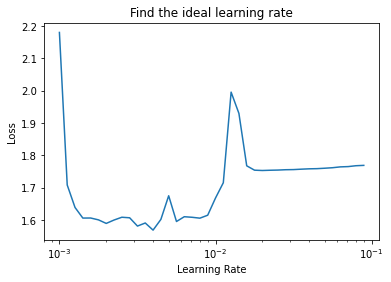

In [102]:
# PLot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs,find_lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Find the ideal learning rate")

In [103]:
# for our problemt eh ideal learning rate of 0.001 looks to be the ideal rate
# Lets fit a model with teh ideal learning rate

# Set random seed
tf.random.set_seed(42)

# Create model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")                                  
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

# Fit the model 
histroy_14 = model_14.fit(train_data_norm,
                          train_labels,
                          epochs= 20,
                          validation_data = (test_data_norm,test_labels))

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

### Evaluating our multi-class classification model

TO evaluate our multi-class classification model we could:
* Evaluate its performance using other classification metrics (such as a confustion matrix)
* Assess some of its predictions (through visualizations)
* Improve its results (by trainign it for longer or changing the architecture).
* Save and export it for us in an application

Lets go through the top 2...


In [104]:
# Create a confusion matrix

# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)


In [105]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [106]:
# Make some prediciotns with out model
y_probs = model_14.predict(test_data_norm) # probs is short for prediction probabilities

# Vie the first 5 predictions
y_probs[:5]

array([[8.5630038e-11, 3.5361923e-13, 2.6633796e-05, 4.6356057e-08,
        5.0949642e-05, 9.6118979e-02, 8.1778097e-08, 9.1868639e-02,
        4.0605105e-03, 8.0787414e-01],
       [3.4278555e-06, 1.2899412e-16, 9.5989150e-01, 2.0516218e-07,
        1.5329195e-02, 2.4532527e-13, 2.4142891e-02, 1.1383710e-28,
        6.3271867e-04, 4.4789640e-08],
       [6.1063060e-05, 9.9657673e-01, 4.3867310e-08, 3.3405882e-03,
        1.3249612e-05, 1.4383545e-21, 8.2791003e-06, 7.3238853e-18,
        5.4811920e-08, 4.9225709e-14],
       [7.5031370e-05, 9.9053699e-01, 4.2528902e-07, 9.2231650e-03,
        1.3623273e-04, 1.8276510e-18, 2.6808373e-05, 4.8125292e-14,
        1.4521634e-06, 2.2211717e-11],
       [7.2189897e-02, 1.5495709e-06, 2.5566906e-01, 1.0363110e-02,
        4.3541320e-02, 1.1069409e-13, 6.1693019e-01, 6.7544158e-23,
        1.3049176e-03, 1.2140382e-09]], dtype=float32)

> **Note:** Remember to make predictions on the same kind of data that your model was trained on. E.g. if your model was trained on normalized data, you will want to make predictions on normalized data.

In [107]:
y_probs, tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([[8.5630038e-11, 3.5361923e-13, 2.6633796e-05, ..., 9.1868639e-02,
         4.0605105e-03, 8.0787414e-01],
        [3.4278555e-06, 1.2899412e-16, 9.5989150e-01, ..., 1.1383710e-28,
         6.3271867e-04, 4.4789640e-08],
        [6.1063060e-05, 9.9657673e-01, 4.3867310e-08, ..., 7.3238853e-18,
         5.4811920e-08, 4.9225709e-14],
        ...,
        [7.8579471e-02, 2.2294847e-05, 1.4033382e-01, ..., 2.9534183e-20,
         1.1197245e-01, 4.7600044e-09],
        [3.3110868e-05, 9.9301320e-01, 2.3392292e-07, ..., 9.3986522e-15,
         8.1592469e-07, 1.2158882e-11],
        [7.9816104e-08, 7.7579027e-10, 1.6470609e-04, ..., 4.3826353e-02,
         1.5162523e-03, 3.9120510e-02]], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [108]:
# Convert all of the prediction probs into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

# The predictions are now in the same format as the test labels

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [109]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

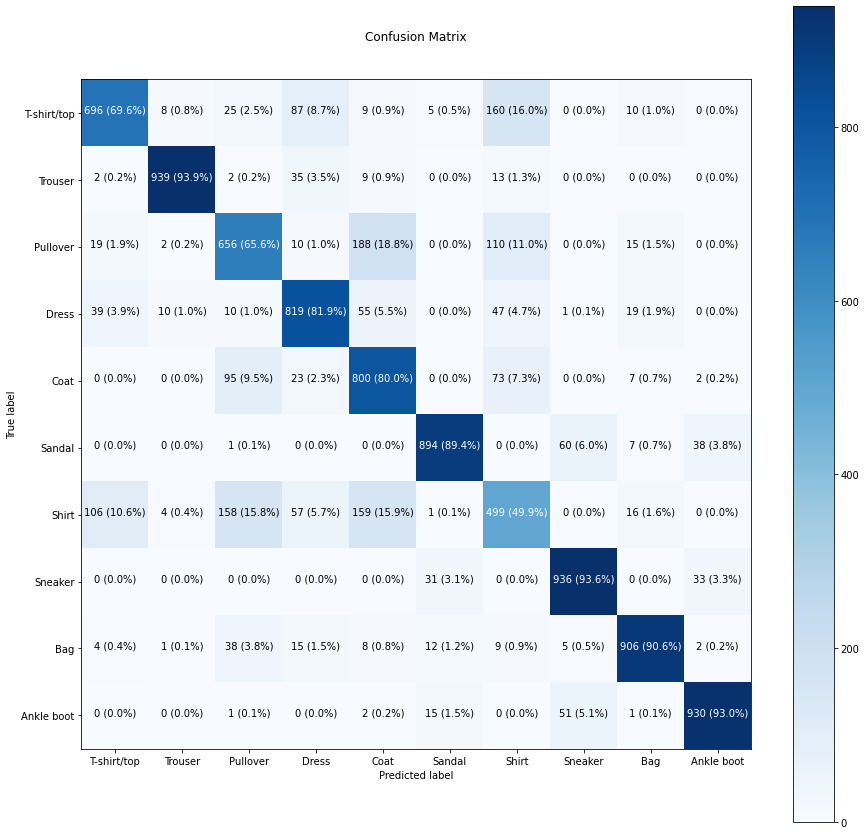

In [110]:
# Make a prettier confusion matrixc
make_confusion_matrix(y_true =test_labels,
                      y_pred =y_preds,
                      classes = class_names,
                      figsize = (15,15),
                      text_size = 10)

**Note:** Often when working with images abd other forms of visual data its a good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outpus of your model.

How about we create a fun little function for:
* Plot a random image
* Make a predictoipn on said image
* Label the plot with the truth label & predicted label.

In [111]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with predcion and truth label:
  """
  # Set up random integers
  i= random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # plot the image
  plt.imshow(target_image,cmap="binary")

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlable information (prediction/true label):
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red based on if prediction is right or wrong


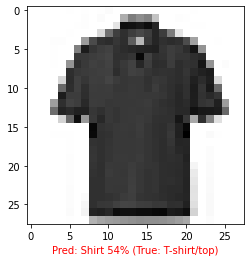

In [112]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

### What patterns exactly is our model learning





In [113]:
# Find the layers of our most recent model
model_14.layers

In [114]:
# Extract a particular layer
model_14.layers[1]

In [115]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[ 0.715027  , -0.06077112, -0.9976308 , -1.0484312 ],
        [ 0.27732143, -0.4715541 , -0.5291646 ,  0.02329262],
        [ 0.7752432 ,  0.5402756 , -1.128857  , -0.7426152 ],
        ...,
        [-0.39453375,  0.47628623, -0.22641547,  0.25505966],
        [-0.40515727,  0.6181007 ,  0.23928417, -0.503876  ],
        [ 0.23884544,  0.11606897, -0.1213136 ,  0.04352434]],
       dtype=float32), (784, 4))

In [116]:
model_14.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_41 (Dense)            (None, 4)                 3140      
                                                                 
 dense_42 (Dense)            (None, 4)                 20        
                                                                 
 dense_43 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Now lets check out the bias vector

In [117]:
# Bias and bias shape
biases, biases.shape

(array([ 2.4485679e-02, -6.1455613e-04, -2.7230152e-01,  8.1124908e-01],
       dtype=float32), (4,))

Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector get initialized as zeroes (at least in the case of a Tensorflow Dense layer).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer. 

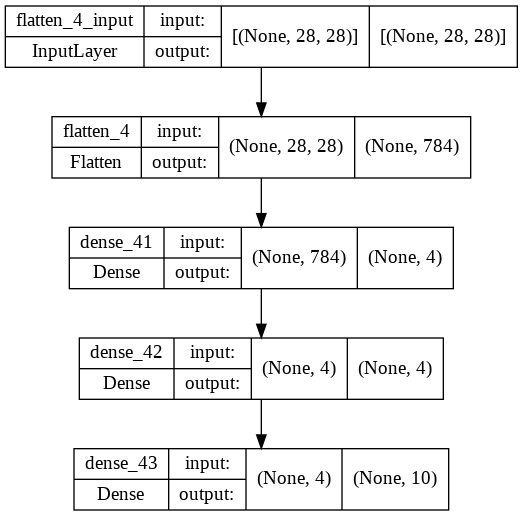

In [118]:
# lets check out another way of doing our deep learning modesl
from tensorflow.keras.utils import plot_model
# See the the inputs and outputs
plot_model(model_14, show_shapes=True)

##**How a model learns (in brief)**

Alright, we've trained a bunch of models, but we've never really discussed what's going on under the hood. So how exactly does a model learn?

A model learns by updating and improving its weight matrices and biases values every epoch (in our case, when we call the fit() fucntion).

It does so by comparing the patterns its learned between the data and labels to the actual labels.

If the current patterns (weight matrices and bias values) don't result in a desirable decrease in the loss function (higher loss means worse predictions), the optimizer tries to steer the model to update its patterns in the right way (using the real labels as a reference).

This process of using the real labels as a reference to improve the model's predictions is called backpropagation.

In other words, data and labels pass through a model (forward pass) and it attempts to learn the relationship between the data and labels.

And if this learned relationship isn't close to the actual relationship or it could be improved, the model does so by going back through itself (backward pass) and tweaking its weights matrices and bias values to better represent the data.

If all of this sounds confusing (and it's fine if it does, the above is a very succinct description), check out the resources in the extra-curriculum section for more.